In [25]:
import duckdb
import matplotlib.pyplot as plt

In [2]:
times = duckdb.sql(f"""
    SELECT pickup_datetime, trip_miles, base_passenger_fare, base_passenger_fare / NULLIF(trip_miles, 0) AS fare_per_mile
    FROM "nyc_data.parquet"
""")

print(times)

┌─────────────────────┬────────────┬─────────────────────┬────────────────────┐
│   pickup_datetime   │ trip_miles │ base_passenger_fare │   fare_per_mile    │
│      timestamp      │   double   │       double        │       double       │
├─────────────────────┼────────────┼─────────────────────┼────────────────────┤
│ 2019-02-01 00:05:18 │       2.45 │                9.35 │ 3.8163265306122445 │
│ 2019-02-01 00:41:29 │       1.71 │                7.91 │  4.625730994152047 │
│ 2019-02-01 00:51:34 │       5.01 │               44.96 │  8.974051896207586 │
│ 2019-02-01 00:03:51 │       0.34 │                7.19 │ 21.147058823529413 │
│ 2019-02-01 00:09:44 │       6.84 │               24.25 │ 3.5453216374269005 │
│ 2019-02-01 00:59:55 │       1.11 │                5.75 │   5.18018018018018 │
│ 2019-02-01 00:12:06 │       4.53 │               16.39 │  3.618101545253863 │
│ 2019-02-01 00:45:35 │      11.24 │               29.77 │  2.648576512455516 │
│ 2019-02-01 00:10:48 │       1.59 │    

In [ ]:
# average = duckdb.sql(f"""
#     SELECT 
#         strftime(pickup_datetime, '%H') AS hour,
#         AVG(base_passenger_fare) AS avg_fare
#     FROM "nyc_data.parquet"
#     GROUP BY hour
#     ORDER BY hour
# """)

average = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare / trip_miles) AS avg_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0
    GROUP BY hour
    ORDER BY hour
""")

print(average)

┌─────────┬────────────────────┐
│  hour   │ avg_fare_per_mile  │
│ varchar │       double       │
├─────────┼────────────────────┤
│ 00      │  5.719785517896246 │
│ 01      │  5.613078132162592 │
│ 02      │  5.621915652865069 │
│ 03      │  5.442126967940464 │
│ 04      │  5.160335121751792 │
│ 05      │  4.629297134323619 │
│ 06      │  4.826960352819467 │
│ 07      │   5.60959278467044 │
│ 08      │  6.054766496780922 │
│ 09      │  5.748844546303007 │
│ ·       │          ·         │
│ ·       │          ·         │
│ ·       │          ·         │
│ 14      │  6.234052254025433 │
│ 15      │  6.348923655124552 │
│ 16      │  6.383773964206404 │
│ 17      │  6.530412782854461 │
│ 18      │  6.458745874315071 │
│ 19      │   6.05828469656502 │
│ 20      │  5.693743083819723 │
│ 21      │ 5.6184442880090275 │
│ 22      │  5.822539111523884 │
│ 23      │ 5.8917159297377255 │
├─────────┴────────────────────┤
│      24 rows (20 shown)      │
└──────────────────────────────┘



In [15]:
# percentiles_50 = duckdb.sql(f"""
#     SELECT 
#         strftime(pickup_datetime, '%H') AS hour,
#         quantile(base_passenger_fare, 0.5) AS median_fare
#     FROM "nyc_data.parquet"
#     GROUP BY hour
#     ORDER BY hour
# """)

percentiles_50 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare / trip_miles, 0.5) AS median_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0  -- Avoid division by zero
    GROUP BY hour
    ORDER BY hour
""")

print(percentiles_50)

┌─────────┬──────────────────────┐
│  hour   │ median_fare_per_mile │
│ varchar │        double        │
├─────────┼──────────────────────┤
│ 00      │    4.507216494845361 │
│ 01      │    4.386411889596603 │
│ 02      │    4.315789473684211 │
│ 03      │    4.120833333333334 │
│ 04      │   3.8503118503118507 │
│ 05      │   3.6663454331298855 │
│ 06      │    4.042001787310098 │
│ 07      │    4.739130434782608 │
│ 08      │    5.090109890109891 │
│ 09      │    4.926345609065156 │
│ ·       │             ·        │
│ ·       │             ·        │
│ ·       │             ·        │
│ 14      │     5.30188679245283 │
│ 15      │    5.400921658986175 │
│ 16      │                 5.44 │
│ 17      │    5.488151658767773 │
│ 18      │    5.372972972972972 │
│ 19      │    5.089700996677741 │
│ 20      │    4.841549295774648 │
│ 21      │    4.712355212355213 │
│ 22      │    4.711477488902981 │
│ 23      │    4.662661737523105 │
├─────────┴──────────────────────┤
│ 24 rows (20 shown)

In [16]:
# percentiles_25 = duckdb.sql(f"""
#     SELECT 
#         strftime(pickup_datetime, '%H') AS hour,
#         quantile(base_passenger_fare, 0.25) AS median_fare
#     FROM "nyc_data.parquet"
#     GROUP BY hour
#     ORDER BY hour
# """)

percentiles_25 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare / trip_miles, 0.25) AS median_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0  -- Avoid division by zero
    GROUP BY hour
    ORDER BY hour
""")


In [18]:
# percentiles_75 = duckdb.sql(f"""
#     SELECT 
#         strftime(pickup_datetime, '%H') AS hour,
#         quantile(base_passenger_fare, 0.75) AS median_fare
#     FROM "nyc_data.parquet"
#     GROUP BY hour
#     ORDER BY hour
# """)

percentiles_75 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare / trip_miles, 0.75) AS median_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0  -- Avoid division by zero
    GROUP BY hour
    ORDER BY hour
""")

In [19]:
# percentiles_90 = duckdb.sql(f"""
#     SELECT 
#         strftime(pickup_datetime, '%H') AS hour,
#         quantile(base_passenger_fare, 0.9) AS median_fare
#     FROM "nyc_data.parquet"
#     GROUP BY hour
#     ORDER BY hour
# """)

percentiles_90 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare / trip_miles, 0.9) AS median_fare_per_mile
    FROM "nyc_data.parquet"
    WHERE trip_miles > 0  -- Avoid division by zero
    GROUP BY hour
    ORDER BY hour
""")

In [22]:
avg_df = average.df()
percentiles_50_df = percentiles_50.df()
percentiles_25_df = percentiles_25.df()
percentiles_75_df = percentiles_75.df()
percentiles_90_df = percentiles_90.df()

# Convert 'hour' to numeric for proper sorting
avg_df["hour"] = avg_df["hour"].astype(int)
percentiles_50_df["hour"] = percentiles_50_df["hour"].astype(int)
percentiles_25_df["hour"] = percentiles_25_df["hour"].astype(int)
percentiles_75_df["hour"] = percentiles_75_df["hour"].astype(int)
percentiles_90_df["hour"] = percentiles_90_df["hour"].astype(int)

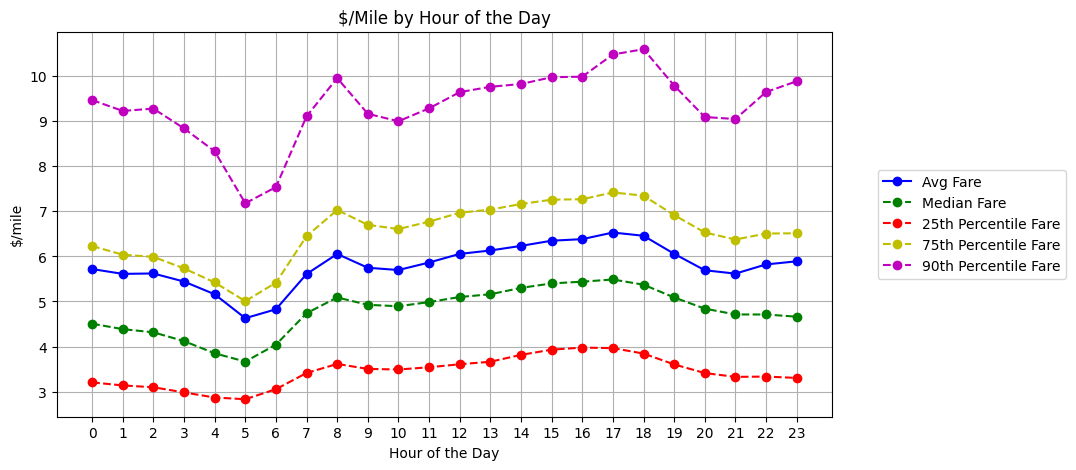

In [24]:
# Plot data
plt.figure(figsize=(10, 5))
plt.plot(avg_df["hour"], avg_df["avg_fare_per_mile"], marker="o", linestyle="-", color="b", label="Avg Fare")
plt.plot(percentiles_50_df["hour"], percentiles_50_df["median_fare_per_mile"], marker="o", linestyle="--", color="g", label="Median Fare")
plt.plot(percentiles_25_df["hour"], percentiles_25_df["median_fare_per_mile"], marker="o", linestyle="--", color="r", label="25th Percentile Fare")
plt.plot(percentiles_75_df["hour"], percentiles_75_df["median_fare_per_mile"], marker="o", linestyle="--", color="y", label="75th Percentile Fare")
plt.plot(percentiles_90_df["hour"], percentiles_90_df["median_fare_per_mile"], marker="o", linestyle="--", color="m", label="90th Percentile Fare")

# Customize plot
plt.xlabel("Hour of the Day")
plt.ylabel("$/mile")
plt.title("$/Mile by Hour of the Day")
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# Show plot
plt.show()